In [14]:
%matplotlib inline
import pybaseball as pb
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 15, 10 #width, height
plt.style.use('ggplot')

Get team data from 1900 to 2017. 

The `ind` argument asks if we want data at the **ind**ividual level. 

`ind=1` means we get each season for each team, whereas `ind=0` means we get each team aggregated over all seasons.

In [15]:
pitching_data = pb.team_pitching(1900, 2015)[['Season', 'Team', 'W', 'L']]

In [16]:
pitching_data['GP'] = pitching_data['W'] + pitching_data['L']

In [17]:
pitching_data.head(5)

,Season,Team,W,L,GP
1,1907.0,Cubs,107.0,44.0,151.0
2,1909.0,Cubs,104.0,49.0,153.0
3,1906.0,Cubs,115.0,36.0,151.0
4,1910.0,Athletics,102.0,48.0,150.0
5,1909.0,Athletics,95.0,58.0,153.0


In [18]:
pitching_data.drop(pitching_data.columns[2:4], axis=1, inplace=True)

In [19]:
pitching_data.head(5)

,Season,Team,GP
1,1907.0,Cubs,151.0
2,1909.0,Cubs,153.0
3,1906.0,Cubs,151.0
4,1910.0,Athletics,150.0
5,1909.0,Athletics,153.0


In [20]:
batting_data = pb.team_batting(1900, 2015)[['Season', 'Team', 'R']]

batting_data.head(5)

,Season,Team,R
1,1927.0,Yankees,976.0
2,1976.0,Reds,857.0
3,1931.0,Yankees,1067.0
4,1939.0,Yankees,967.0
5,1969.0,Orioles,779.0


In [21]:
result = pd.merge(pitching_data, batting_data)

In [22]:
result.head(5)

,Season,Team,GP,R
0,1907.0,Cubs,151.0,571.0
1,1909.0,Cubs,153.0,632.0
2,1906.0,Cubs,151.0,704.0
3,1910.0,Athletics,150.0,670.0
4,1909.0,Athletics,153.0,601.0


In [23]:
seasons = result['Season'].tolist()
runs = result['R'].tolist()
games = result['GP'].tolist()
avg_runs_per_team_per_game = [r/g for r,g in zip(runs, games)]

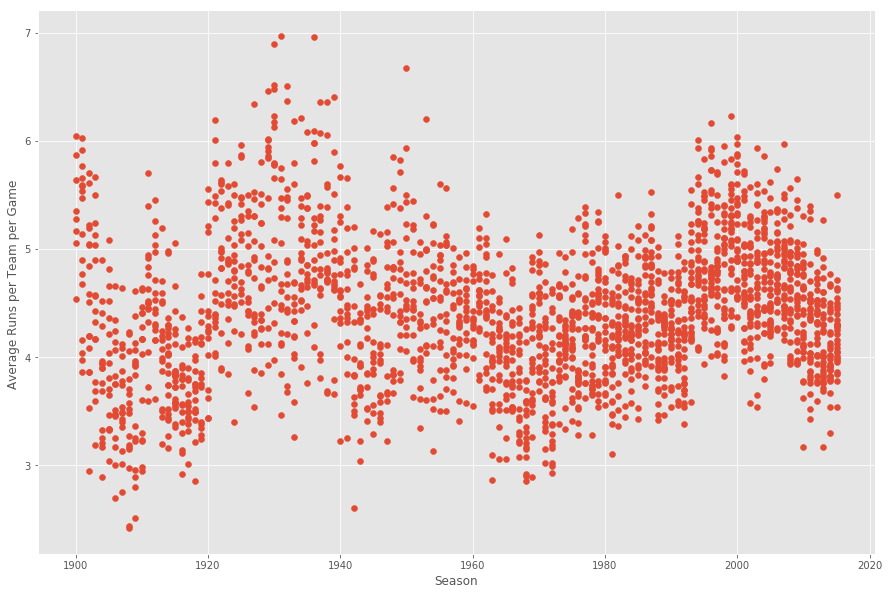

In [24]:
plt.scatter(seasons, avg_runs_per_team_per_game)
plt.xlabel('Season')
plt.ylabel('Average Runs per Team per Game ')
plt.show()

In [26]:
result.groupby(['Season']).mean().head(5)

,GP,R
Season,,
1900.0,138.250,741.5000
1901.0,136.750,692.0625
1902.0,136.375,617.4375
1903.0,137.375,618.0000
1904.0,152.375,581.3750


In [27]:
arptps = result.groupby(['Season']).mean()['R'].tolist() #average runs per team per season
agptps = result.groupby(['Season']).mean()['GP'].tolist() #average games per team per season
aragptps = [x/y for x,y in zip(arptps,agptps)] #average runs / average games per team per season
s = list(range(1900, 2016))

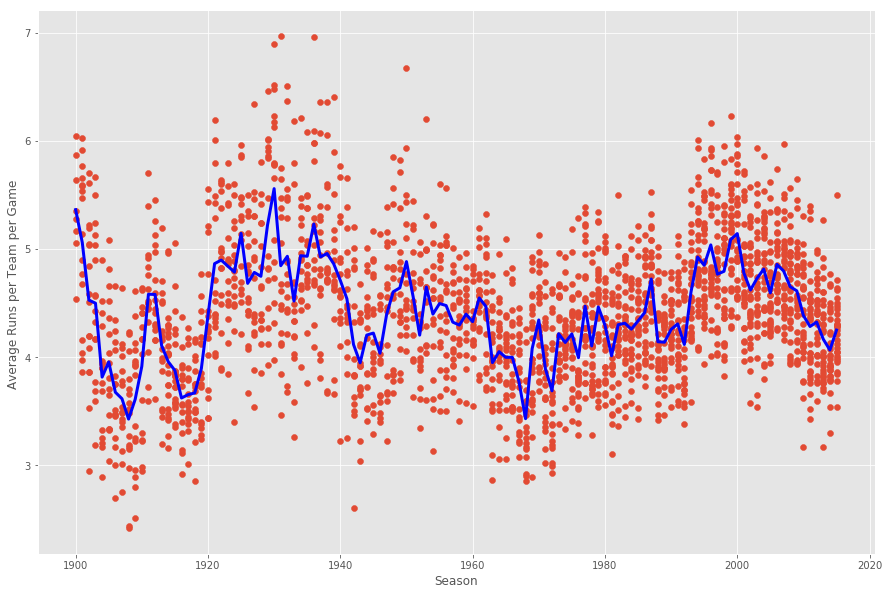

In [28]:
plt.scatter(seasons, avg_runs_per_team_per_game)
plt.plot(s, aragptps, 'b', linewidth=3)
plt.xlabel('Season')
plt.ylabel('Average Runs per Team per Game ')
plt.show()